In [1]:
# Import Dependencies
import datetime as dt
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, MetaData
# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create an engine for the hawaii.sqlite database
#################################################
# Database Setup
#################################################
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#conn = engine.connect()

In [3]:
# Reflect Database into ORM classes
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [4]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurements', 'stations']

In [5]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [6]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurements', 'stations']

In [7]:
# Create a database session object
session = Session(engine)

In [8]:
# Save a reference to the stations table as `Stations`
Stations = Base.classes.stations

# List all of the station name found in the station table
station_list = session.query(Stations)
for station in station_list:
    print(station.name)

WAIKIKI 717.2, HI US
KANEOHE 838.1, HI US
KUALOA RANCH HEADQUARTERS 886.9, HI US
PEARL CITY, HI US
UPPER WAHIAWA 874.3, HI US
WAIMANALO EXPERIMENTAL FARM, HI US
WAIHEE 837.5, HI US
HONOLULU OBSERVATORY 702.2, HI US
MANOA LYON ARBO 785.2, HI US


In [9]:
columns = inspector.get_columns('stations')
for column in columns:
    print(column["name"], column["type"])

station VARCHAR(30)
name VARCHAR(255)
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Save a reference to the measurements table as `Measurements`
Measurements = Base.classes.measurements

# List all of the measurements name found in the measurement table
measurement_list = session.query(Measurements)
for measurement in measurement_list:
    print(measurement.date, measurement.prcp)

2010-01-01 0.08
2010-01-02 0.0
2010-01-03 0.0
2010-01-04 0.0
2010-01-07 0.06
2010-01-08 0.0
2010-01-09 0.0
2010-01-10 0.0
2010-01-11 0.01
2010-01-12 0.0
2010-01-14 0.0
2010-01-15 0.0
2010-01-16 0.0
2010-01-17 0.0
2010-01-18 0.0
2010-01-19 0.0
2010-01-20 0.0
2010-01-21 0.0
2010-01-22 0.0
2010-01-23 0.0
2010-01-24 0.01
2010-01-25 0.0
2010-01-26 0.04
2010-01-27 0.12
2010-01-28 0.0
2010-01-31 0.03
2010-02-01 0.01
2010-02-04 0.01
2010-02-05 0.0
2010-02-06 0.0
2010-02-07 0.0
2010-02-08 0.0
2010-02-09 0.0
2010-02-11 0.0
2010-02-12 0.02
2010-02-13 0.01
2010-02-14 0.0
2010-02-15 0.0
2010-02-16 0.0
2010-02-17 0.0
2010-02-20 0.03
2010-02-21 0.0
2010-02-22 0.0
2010-02-23 0.0
2010-02-24 0.0
2010-02-25 0.0
2010-02-26 0.0
2010-02-28 0.0
2010-03-01 0.01
2010-03-02 0.0
2010-03-03 0.0
2010-03-04 0.12
2010-03-05 0.08
2010-03-06 0.03
2010-03-07 0.0
2010-03-08 0.43
2010-03-09 0.06
2010-03-12 0.0
2010-03-13 0.0
2010-03-14 0.0
2010-03-15 0.06
2010-03-17 0.0
2010-03-18 0.0
2010-03-21 0.0
2010-03-22 0.0
2010-0

2012-02-22 0.0
2012-02-23 0.0
2012-02-24 0.0
2012-02-25 0.0
2012-02-26 0.05
2012-02-27 0.06
2012-02-28 0.0
2012-02-29 0.0
2012-03-01 0.06
2012-03-02 0.0
2012-03-03 0.03
2012-03-04 0.01
2012-03-05 1.08
2012-03-06 4.0
2012-03-07 2.42
2012-03-08 0.02
2012-03-09 0.19
2012-03-10 0.06
2012-03-11 0.0
2012-03-12 0.03
2012-03-13 0.0
2012-03-14 0.0
2012-03-15 0.0
2012-03-16 0.05
2012-03-17 0.0
2012-03-18 0.0
2012-03-19 0.0
2012-03-20 0.0
2012-03-21 0.0
2012-03-22 0.03
2012-03-23 0.01
2012-03-24 0.0
2012-03-25 0.0
2012-03-26 0.11
2012-03-27 0.03
2012-03-28 0.02
2012-03-29 0.0
2012-03-30 0.0
2012-03-31 0.0
2012-04-01 0.0
2012-04-02 0.0
2012-04-03 0.0
2012-04-04 0.0
2012-04-05 0.19
2012-04-06 0.0
2012-04-07 0.03
2012-04-08 0.0
2012-04-09 0.07
2012-04-10 0.05
2012-04-11 0.06
2012-04-12 0.0
2012-04-13 0.03
2012-04-14 0.0
2012-04-15 0.01
2012-04-16 0.01
2012-04-17 0.0
2012-04-18 0.0
2012-04-19 0.0
2012-04-20 0.0
2012-04-21 0.01
2012-04-22 0.04
2012-04-23 0.03
2012-04-24 0.0
2012-04-25 0.0
2012-04-26 0

2014-12-07 0.0
2014-12-08 0.0
2014-12-09 0.0
2014-12-10 0.0
2014-12-11 0.05
2014-12-12 0.01
2014-12-13 0.0
2014-12-14 0.03
2014-12-15 0.02
2014-12-16 0.01
2014-12-17 0.01
2014-12-18 0.0
2014-12-19 0.0
2014-12-20 0.0
2014-12-21 0.0
2014-12-22 0.0
2014-12-23 0.93
2014-12-24 0.04
2014-12-25 0.02
2014-12-26 0.0
2014-12-27 0.0
2014-12-28 0.0
2014-12-29 0.0
2014-12-30 0.0
2014-12-31 0.05
2015-01-01 0.0
2015-01-02 0.04
2015-01-03 0.86
2015-01-04 0.02
2015-01-05 0.0
2015-01-06 0.02
2015-01-07 0.0
2015-01-08 0.0
2015-01-09 0.0
2015-01-10 0.0
2015-01-11 0.0
2015-01-12 0.0
2015-01-13 0.0
2015-01-14 0.0
2015-01-15 0.0
2015-01-16 0.0
2015-01-17 0.0
2015-01-18 0.0
2015-01-19 0.0
2015-01-20 0.0
2015-01-21 0.0
2015-01-22 0.0
2015-01-23 0.0
2015-01-24 0.2
2015-01-25 0.03
2015-01-26 0.0
2015-01-27 0.0
2015-01-28 0.0
2015-01-29 0.0
2015-01-30 0.0
2015-01-31 0.0
2015-02-01 0.0
2015-02-02 0.0
2015-02-03 0.0
2015-02-04 0.01
2015-02-05 0.19
2015-02-06 0.0
2015-02-07 0.0
2015-02-08 0.0
2015-02-09 0.0
2015-02-

2010-01-22 0.0
2010-01-23 0.0
2010-01-24 0.0
2010-01-25 0.0
2010-01-26 0.0
2010-01-27 0.12
2010-01-28 0.19
2010-01-29 0.19
2010-01-30 1.7
2010-01-31 0.28
2010-02-01 0.01
2010-02-02 0.0
2010-02-03 0.31
2010-02-04 0.0
2010-02-05 0.0
2010-02-06 0.06
2010-02-07 0.0
2010-02-08 0.0
2010-02-09 0.0
2010-02-10 0.0
2010-02-14 0.0
2010-02-15 0.0
2010-02-16 0.0
2010-02-17 0.02
2010-02-18 0.0
2010-02-19 0.05
2010-02-20 0.17
2010-02-21 0.04
2010-02-22 0.87
2010-02-23 0.0
2010-02-24 0.0
2010-02-25 0.0
2010-02-26 0.0
2010-02-27 0.0
2010-02-28 0.0
2010-03-01 0.04
2010-03-02 0.0
2010-03-03 0.0
2010-03-04 0.33
2010-03-05 0.21
2010-03-06 0.09
2010-03-07 0.0
2010-03-08 0.34
2010-03-09 0.05
2010-03-10 0.04
2010-03-11 0.09
2010-03-12 0.03
2010-03-13 0.0
2010-03-14 0.0
2010-03-15 0.16
2010-03-16 0.16
2010-03-17 0.4
2010-03-18 0.44
2010-03-19 0.08
2010-03-20 0.01
2010-03-21 0.0
2010-03-22 0.0
2010-03-23 0.0
2010-03-24 0.03
2010-03-25 0.01
2010-03-26 0.02
2010-03-27 0.01
2010-03-28 0.01
2010-03-29 0.0
2010-03-3

2012-11-12 0.0
2012-11-13 0.08
2012-11-14 0.07
2012-11-15 0.05
2012-11-16 0.13
2012-11-17 0.03
2012-11-18 0.06
2012-11-19 0.06
2012-11-20 0.0
2012-11-21 0.01
2012-11-22 0.88
2012-11-23 0.0
2012-11-24 0.02
2012-11-25 0.0
2012-11-26 0.03
2012-11-27 0.0
2012-11-28 0.0
2012-11-29 0.0
2012-11-30 0.0
2012-12-01 0.0
2012-12-02 0.0
2012-12-03 0.0
2012-12-04 0.18
2012-12-05 0.07
2012-12-06 0.0
2012-12-07 0.0
2012-12-08 0.0
2012-12-09 0.0
2012-12-10 0.03
2012-12-11 0.0
2012-12-12 0.07
2012-12-13 0.1
2012-12-14 0.08
2012-12-15 0.1
2012-12-16 0.04
2012-12-17 0.02
2012-12-18 0.2
2012-12-19 0.24
2012-12-20 0.08
2012-12-21 0.06
2012-12-22 0.07
2012-12-23 0.02
2012-12-24 0.0
2012-12-25 0.0
2012-12-26 0.01
2012-12-27 0.0
2012-12-28 0.0
2012-12-29 0.0
2012-12-30 0.21
2012-12-31 0.17
2013-01-01 0.16
2013-01-02 0.07
2013-01-03 0.23
2013-01-04 0.06
2013-01-05 0.08
2013-01-06 0.19
2013-01-07 0.04
2013-01-08 0.04
2013-01-09 0.16
2013-01-10 0.05
2013-01-11 0.0
2013-01-14 0.0
2013-01-15 1.27
2013-01-16 0.0
201

2015-09-24 0.01
2015-09-25 0.0
2015-09-26 0.36
2015-09-27 0.18
2015-09-28 0.17
2015-09-29 0.07
2015-09-30 0.17
2015-10-01 0.0
2015-10-02 0.02
2015-10-03 0.0
2015-10-04 0.0
2015-10-05 0.4
2015-10-06 0.22
2015-10-07 0.22
2015-10-08 0.05
2015-10-09 0.03
2015-10-10 0.11
2015-10-11 0.09
2015-10-12 1.0
2015-10-13 1.7
2015-10-14 1.21
2015-10-15 0.81
2015-10-16 0.73
2015-10-17 0.1
2015-10-18 0.03
2015-10-19 0.18
2015-10-20 0.2
2015-10-21 0.02
2015-10-22 0.0
2015-10-23 0.03
2015-10-24 0.0
2015-10-25 0.03
2015-10-26 0.04
2015-10-27 0.06
2015-10-28 0.27
2015-10-29 0.02
2015-10-30 0.02
2015-10-31 0.22
2015-11-01 0.33
2015-11-02 0.0
2015-11-03 0.0
2015-11-04 0.03
2015-11-05 0.12
2015-11-06 0.12
2015-11-07 0.12
2015-11-08 0.3
2015-11-09 0.11
2015-11-10 0.06
2015-11-11 0.0
2015-11-12 0.3
2015-11-13 0.1
2015-11-14 0.53
2015-11-15 0.08
2015-11-16 0.0
2015-11-17 0.1
2015-11-18 0.1
2015-11-19 0.18
2015-11-20 0.68
2015-11-21 1.61
2015-11-22 0.8
2015-11-23 0.48
2015-11-24 1.7
2015-11-25 0.11
2015-11-26 0.3

2011-03-05 0.26
2011-03-06 0.64
2011-03-07 0.0
2011-03-08 0.03
2011-03-09 0.16
2011-03-10 1.4
2011-03-11 0.02
2011-03-15 0.0
2011-03-16 0.0
2011-03-17 0.07
2011-03-18 0.1
2011-03-19 0.14
2011-03-22 0.04
2011-03-23 0.0
2011-03-24 0.15
2011-03-29 0.0
2011-03-30 0.0
2011-03-31 0.0
2011-04-01 0.35
2011-04-05 0.0
2011-04-06 0.0
2011-04-07 0.59
2011-04-08 0.31
2011-04-11 0.0
2011-04-12 0.0
2011-04-13 0.0
2011-04-14 0.0
2011-04-15 0.0
2011-04-18 0.0
2011-04-19 0.0
2011-04-20 0.0
2011-04-21 0.0
2011-04-22 0.0
2011-04-23 0.04
2011-04-25 0.0
2011-04-26 0.0
2011-04-27 0.03
2011-04-28 0.0
2011-04-29 0.34
2011-04-30 0.12
2011-05-03 0.64
2011-05-04 0.11
2011-05-05 0.08
2011-05-06 0.4
2011-05-07 0.99
2011-05-10 0.38
2011-05-11 0.01
2011-05-12 0.0
2011-05-13 0.0
2011-05-16 0.0
2011-05-17 0.0
2011-05-18 0.56
2011-05-19 0.02
2011-05-20 0.0
2011-05-23 0.0
2011-05-24 0.0
2011-05-25 0.01
2011-05-26 0.02
2011-05-27 0.09
2011-05-31 0.0
2011-06-01 0.19
2011-06-02 0.04
2011-06-03 1.75
2011-06-04 1.14
2011-06-0

2015-05-25 0.0
2015-05-26 0.06
2015-05-27 0.05
2015-05-28 0.64
2015-05-29 0.0
2015-05-30 0.14
2015-06-01 0.05
2015-06-03 0.0
2015-06-04 0.22
2015-06-05 0.0
2015-06-06 0.0
2015-06-09 0.0
2015-06-10 0.0
2015-06-11 0.0
2015-06-12 0.03
2015-06-15 0.0
2015-06-16 0.0
2015-06-17 0.16
2015-06-18 0.04
2015-06-19 0.02
2015-06-20 0.06
2015-06-21 0.0
2015-06-22 0.04
2015-06-23 0.02
2015-06-24 0.01
2015-06-25 0.2
2015-06-26 0.11
2015-06-27 0.09
2015-06-28 0.0
2015-06-29 0.11
2015-06-30 1.1
2015-07-01 0.0
2015-07-12 0.15
2015-07-13 0.06
2015-07-14 0.11
2015-07-15 0.04
2015-07-16 0.21
2015-07-17 1.24
2015-07-18 0.01
2015-07-21 0.0
2015-07-22 0.0
2015-07-23 0.0
2015-07-24 0.03
2015-07-25 0.2
2015-07-26 0.0
2015-07-27 0.0
2015-07-28 0.0
2015-07-29 0.0
2015-07-30 0.01
2015-08-12 0.0
2015-08-13 0.0
2015-08-14 0.09
2015-08-15 0.33
2015-08-18 0.2
2015-08-19 0.2
2015-08-20 0.0
2015-08-21 0.0
2015-08-22 0.0
2015-08-23 0.62
2015-08-24 3.7
2015-08-25 0.13
2015-08-26 0.11
2015-08-27 0.05
2015-08-28 0.0
2015-08-

2013-06-20 0.04
2013-06-21 0.08
2013-06-27 0.01
2013-07-01 0.03
2013-07-02 0.04
2013-07-03 0.08
2013-07-12 0.04
2013-07-16 0.0
2013-07-17 0.02
2013-07-23 0.26
2013-07-24 0.02
2013-07-25 0.01
2013-08-01 0.5
2013-08-02 0.02
2013-08-08 0.0
2013-08-09 0.0
2013-08-13 0.0
2013-08-14 0.04
2013-08-15 0.0
2013-08-27 0.0
2013-08-28 0.0
2013-08-29 0.05
2013-09-04 0.0
2013-09-05 0.0
2013-09-06 0.0
2013-09-10 0.0
2013-09-11 0.0
2013-09-12 0.0
2013-09-13 0.3
2013-09-20 0.0
2013-09-26 0.2
2013-09-27 0.03
2013-10-03 0.0
2013-10-08 0.0
2013-10-11 0.0
2013-10-16 0.05
2013-10-17 0.0
2013-10-18 0.0
2013-10-22 0.0
2013-10-23 0.0
2013-10-24 0.0
2013-10-29 0.0
2013-10-30 0.0
2013-10-31 0.0
2013-11-01 0.0
2013-11-05 0.0
2013-11-06 0.0
2013-11-07 0.0
2013-11-14 0.0
2013-11-15 0.2
2013-11-21 0.0
2013-11-22 0.0
2013-11-26 0.0
2013-11-27 0.0
2013-12-05 0.0
2013-12-06 0.02
2013-12-10 0.0
2013-12-11 0.0
2013-12-12 0.0
2013-12-13 0.0
2013-12-17 0.02
2013-12-27 0.0
2014-01-03 0.63
2014-01-07 0.0
2014-01-08 0.0
2014-0

2010-12-30 0.27
2010-12-31 0.01
2011-01-01 0.03
2011-01-02 0.0
2011-01-03 0.0
2011-01-04 0.0
2011-01-05 0.0
2011-01-06 0.15
2011-01-07 0.02
2011-01-08 0.0
2011-01-09 0.0
2011-01-10 0.0
2011-01-11 0.43
2011-01-12 1.34
2011-01-13 3.62
2011-01-14 0.1
2011-01-15 0.0
2011-01-16 0.0
2011-01-17 0.19
2011-01-18 0.0
2011-01-19 0.07
2011-01-20 0.0
2011-01-21 0.0
2011-01-22 0.0
2011-01-23 0.0
2011-01-24 0.0
2011-01-25 0.0
2011-01-26 0.0
2011-01-27 0.0
2011-01-28 0.0
2011-01-29 0.01
2011-01-30 0.0
2011-01-31 0.15
2011-02-01 0.0
2011-02-02 0.0
2011-02-03 0.0
2011-02-04 0.0
2011-02-05 0.0
2011-02-06 0.0
2011-02-07 0.95
2011-02-08 0.18
2011-02-09 0.0
2011-02-10 0.04
2011-02-11 0.29
2011-02-12 1.82
2011-02-13 0.71
2011-02-15 0.0
2011-02-16 0.0
2011-02-17 0.0
2011-02-18 0.01
2011-02-19 0.0
2011-02-20 0.3
2011-02-21 0.02
2011-02-22 0.01
2011-02-23 0.01
2011-02-24 1.44
2011-02-25 0.0
2011-02-26 0.05
2011-02-27 0.0
2011-02-28 0.02
2011-03-01 0.18
2011-03-02 0.01
2011-03-03 0.06
2011-03-04 1.7
2011-03-05 0

2013-01-25 0.43
2013-01-26 0.01
2013-01-27 0.02
2013-01-28 2.48
2013-01-29 0.61
2013-01-30 0.03
2013-01-31 0.02
2013-02-01 0.01
2013-02-02 0.0
2013-02-03 0.0
2013-02-04 0.01
2013-02-05 0.01
2013-02-06 0.0
2013-02-07 0.09
2013-02-08 0.0
2013-02-09 0.06
2013-02-10 0.0
2013-02-11 0.08
2013-02-12 0.06
2013-02-13 0.0
2013-02-14 0.0
2013-02-15 0.0
2013-02-16 0.03
2013-02-17 0.0
2013-02-18 0.0
2013-02-19 0.16
2013-02-20 0.03
2013-02-21 0.13
2013-02-22 0.25
2013-02-23 0.05
2013-02-24 0.0
2013-02-25 0.07
2013-02-26 0.03
2013-02-27 0.0
2013-02-28 0.0
2013-03-01 0.0
2013-03-02 0.03
2013-03-03 0.0
2013-03-04 0.0
2013-03-05 0.0
2013-03-06 0.0
2013-03-07 0.04
2013-03-08 0.0
2013-03-09 0.13
2013-03-10 1.11
2013-03-11 1.02
2013-03-12 0.02
2013-03-13 0.06
2013-03-14 0.13
2013-03-15 0.0
2013-03-16 0.0
2013-03-17 0.0
2013-03-18 0.09
2013-03-19 0.0
2013-03-20 0.0
2013-03-21 0.0
2013-03-22 0.0
2013-03-23 0.59
2013-03-26 0.0
2013-03-27 0.12
2013-03-28 0.03
2013-03-29 0.15
2013-03-30 0.03
2013-03-31 0.02
201

2016-03-08 0.02
2016-03-09 0.3
2016-03-10 0.0
2016-03-11 0.0
2016-03-12 0.0
2016-03-17 0.0
2016-03-18 0.0
2016-03-22 0.0
2016-03-23 1.05
2016-03-24 0.0
2016-03-25 0.03
2016-03-26 0.03
2016-03-27 0.0
2016-03-28 0.0
2016-03-29 0.04
2016-03-30 0.0
2016-03-31 0.01
2016-04-01 0.0
2016-04-02 0.0
2016-04-03 0.0
2016-04-04 0.0
2016-04-07 0.0
2016-04-08 0.0
2016-04-09 0.0
2016-04-10 0.0
2016-04-11 0.0
2016-04-12 0.0
2016-04-13 0.18
2016-04-14 0.08
2016-04-15 0.04
2016-04-16 0.0
2016-04-17 0.09
2016-04-18 0.46
2016-04-21 0.0
2016-04-22 0.0
2016-04-23 0.04
2016-04-24 0.29
2016-04-25 0.0
2016-04-26 0.0
2016-04-27 0.0
2016-04-28 0.0
2016-04-29 0.0
2016-04-30 0.0
2016-05-01 0.09
2016-05-02 0.07
2016-05-03 0.0
2016-05-04 0.0
2016-05-05 0.27
2016-05-06 0.0
2016-05-07 1.8
2016-05-08 0.75
2016-05-09 0.02
2016-05-10 0.0
2016-05-11 0.0
2016-05-12 0.0
2016-05-13 0.0
2016-05-14 0.06
2016-05-15 0.0
2016-05-16 0.0
2016-05-17 0.0
2016-05-18 0.0
2016-05-19 0.0
2016-05-20 0.0
2016-05-21 0.0
2016-05-22 0.0
2016-0

2011-06-26 0.11
2011-06-27 0.09
2011-06-28 0.12
2011-06-29 0.08
2011-06-30 0.03
2011-07-01 0.02
2011-07-02 0.02
2011-07-03 0.0
2011-07-04 0.02
2011-07-05 0.06
2011-07-06 0.03
2011-07-07 0.15
2011-07-08 0.09
2011-07-09 0.05
2011-07-10 0.04
2011-07-11 0.08
2011-07-12 0.01
2011-07-13 0.01
2011-07-14 0.06
2011-07-15 0.22
2011-07-16 0.05
2011-07-17 0.17
2011-07-18 0.04
2011-07-19 0.0
2011-07-20 0.06
2011-07-21 0.28
2011-07-22 0.12
2011-07-23 0.01
2011-07-24 0.02
2011-07-25 0.24
2011-07-26 0.02
2011-07-27 0.25
2011-07-28 0.09
2011-07-29 0.07
2011-07-30 0.85
2011-07-31 0.0
2011-08-01 0.0
2011-08-02 0.08
2011-08-03 0.05
2011-08-04 0.12
2011-08-05 0.07
2011-08-06 0.02
2011-08-07 0.08
2011-08-08 0.0
2011-08-09 0.42
2011-08-10 0.01
2011-08-11 0.0
2011-08-12 0.02
2011-08-13 0.11
2011-08-14 0.08
2011-08-15 0.01
2011-08-16 0.05
2011-08-17 0.05
2011-08-18 0.0
2011-08-19 0.04
2011-08-20 0.07
2011-08-21 0.25
2011-08-22 0.18
2011-08-23 0.17
2011-08-24 0.03
2011-08-25 0.01
2011-08-26 0.04
2011-08-27 0.03

2014-03-22 0.03
2014-03-23 0.0
2014-03-24 0.0
2014-03-25 0.0
2014-03-26 0.75
2014-03-27 0.27
2014-03-28 3.86
2014-03-29 0.26
2014-03-30 1.23
2014-03-31 0.03
2014-04-01 0.03
2014-04-02 0.66
2014-04-03 0.1
2014-04-04 0.0
2014-04-05 0.0
2014-04-06 0.03
2014-04-07 0.3
2014-04-08 0.32
2014-04-09 0.0
2014-04-10 0.02
2014-04-11 0.0
2014-04-12 0.37
2014-04-13 0.11
2014-04-14 0.0
2014-04-15 0.1
2014-04-16 0.02
2014-04-17 0.12
2014-04-18 0.14
2014-04-19 0.01
2014-04-20 0.12
2014-04-21 0.22
2014-04-22 0.24
2014-04-23 0.0
2014-04-24 0.22
2014-04-25 0.2
2014-04-26 0.03
2014-04-27 0.68
2014-04-28 0.42
2014-04-29 0.01
2014-04-30 0.22
2014-05-01 0.06
2014-05-02 0.36
2014-05-03 0.57
2014-05-04 0.03
2014-05-05 0.11
2014-05-06 0.08
2014-05-07 0.0
2014-05-08 0.33
2014-05-09 0.04
2014-05-10 0.09
2014-05-11 0.08
2014-05-12 1.02
2014-05-13 0.11
2014-05-14 0.0
2014-05-15 0.13
2014-05-16 0.43
2014-05-17 0.07
2014-05-18 0.1
2014-05-19 0.03
2014-05-20 0.14
2014-05-21 0.0
2014-05-22 0.1
2014-05-23 0.33
2014-05-24

2016-12-16 0.03
2016-12-17 0.07
2016-12-18 0.16
2016-12-19 0.03
2016-12-20 0.0
2016-12-21 0.11
2016-12-22 0.86
2016-12-23 0.24
2016-12-24 0.2
2016-12-25 0.02
2016-12-26 0.22
2016-12-27 0.05
2016-12-28 0.09
2016-12-29 0.52
2016-12-30 0.29
2016-12-31 0.25
2017-01-01 0.03
2017-01-02 0.01
2017-01-03 0.0
2017-01-04 0.0
2017-01-05 0.06
2017-01-06 0.1
2017-01-07 0.0
2017-01-08 0.0
2017-01-09 0.0
2017-01-10 0.0
2017-01-11 0.0
2017-01-12 0.0
2017-01-13 0.0
2017-01-14 0.01
2017-01-15 0.0
2017-01-16 0.0
2017-01-17 0.0
2017-01-18 0.0
2017-01-19 0.02
2017-01-20 0.0
2017-01-21 0.03
2017-01-22 0.09
2017-01-23 0.01
2017-01-24 0.13
2017-01-25 0.79
2017-01-26 0.0
2017-01-27 0.03
2017-01-28 0.0
2017-01-29 0.26
2017-01-30 0.0
2017-01-31 0.0
2017-02-01 0.0
2017-02-02 0.0
2017-02-03 0.0
2017-02-04 0.0
2017-02-05 0.0
2017-02-06 0.18
2017-02-07 1.32
2017-02-08 0.0
2017-02-09 0.0
2017-02-10 0.0
2017-02-11 1.73
2017-02-12 2.98
2017-02-13 0.01
2017-02-14 0.0
2017-02-15 0.01
2017-02-16 0.73
2017-02-17 0.13
2017-0

2012-02-26 0.01
2012-02-27 0.38
2012-02-28 0.0
2012-02-29 0.01
2012-03-01 0.0
2012-03-02 0.0
2012-03-03 0.0
2012-03-04 0.05
2012-03-05 0.7
2012-03-06 2.83
2012-03-07 0.91
2012-03-08 0.0
2012-03-09 0.0
2012-03-10 0.19
2012-03-11 0.0
2012-03-12 0.0
2012-03-13 0.0
2012-03-14 0.0
2012-03-15 0.0
2012-03-16 0.02
2012-03-17 0.0
2012-03-18 0.02
2012-03-19 0.02
2012-03-20 0.0
2012-03-21 0.0
2012-03-22 0.0
2012-03-23 0.0
2012-03-24 0.0
2012-03-25 0.0
2012-03-26 0.03
2012-03-27 0.0
2012-03-28 0.0
2012-03-29 0.0
2012-03-30 0.0
2012-03-31 0.0
2012-04-01 0.0
2012-04-02 0.0
2012-04-03 0.0
2012-04-04 0.0
2012-04-05 0.0
2012-04-06 0.0
2012-04-07 0.04
2012-04-08 0.0
2012-04-09 0.03
2012-04-10 0.19
2012-04-11 0.06
2012-04-12 0.0
2012-04-13 0.0
2012-04-14 0.0
2012-04-15 0.0
2012-04-16 0.0
2012-04-17 0.0
2012-04-18 0.0
2012-04-19 0.0
2012-04-20 0.0
2012-04-21 0.0
2012-04-22 0.08
2012-04-23 0.02
2012-04-24 0.0
2012-04-25 0.0
2012-04-26 0.0
2012-04-27 0.0
2012-04-28 0.0
2012-04-29 0.0
2012-04-30 0.0
2012-05-

2014-12-15 0.0
2014-12-16 0.0
2014-12-17 0.03
2014-12-18 0.0
2014-12-19 0.0
2014-12-20 0.0
2014-12-21 0.0
2014-12-22 0.01
2014-12-23 0.1
2014-12-24 0.0
2014-12-25 0.0
2014-12-26 0.0
2014-12-27 0.0
2014-12-28 0.0
2014-12-29 0.0
2014-12-30 0.0
2014-12-31 0.7
2015-01-01 0.0
2015-01-02 0.0
2015-01-03 0.75
2015-01-04 0.0
2015-01-05 0.0
2015-01-06 0.01
2015-01-07 0.0
2015-01-08 0.0
2015-01-09 0.0
2015-01-10 0.0
2015-01-11 0.0
2015-01-12 0.01
2015-01-13 0.0
2015-01-14 0.0
2015-01-15 0.0
2015-01-16 0.01
2015-01-17 0.03
2015-01-18 0.0
2015-01-19 0.0
2015-01-20 0.0
2015-01-21 0.0
2015-01-22 0.0
2015-01-23 0.0
2015-01-24 0.0
2015-01-25 0.0
2015-01-26 0.0
2015-01-27 0.0
2015-01-28 0.0
2015-01-29 0.01
2015-01-30 0.07
2015-01-31 0.0
2015-02-01 0.0
2015-02-03 0.0
2015-02-06 0.0
2015-02-07 0.0
2015-02-08 0.0
2015-02-09 0.0
2015-02-10 0.08
2015-02-11 0.0
2015-02-12 0.0
2015-02-15 0.02
2015-02-16 0.0
2015-02-17 0.01
2015-02-18 0.0
2015-02-19 0.0
2015-02-20 0.0
2015-02-21 0.28
2015-02-22 0.0
2015-02-23 0

2012-06-07 0.12
2012-06-08 0.3
2012-06-09 0.0
2012-06-10 0.08
2012-06-11 0.08
2012-06-12 0.14
2012-06-13 0.48
2012-06-14 0.21
2012-06-15 0.0
2012-06-16 0.0
2012-06-17 0.1
2012-06-18 0.0
2012-06-19 0.38
2012-06-20 1.84
2012-06-21 0.34
2012-06-23 0.94
2012-06-24 1.13
2012-06-25 0.89
2012-06-26 0.92
2012-06-27 0.73
2012-06-28 0.37
2012-06-29 0.79
2012-07-02 0.05
2012-07-03 1.04
2012-07-04 0.85
2012-07-05 0.98
2012-07-06 1.08
2012-07-07 0.86
2012-07-08 0.05
2012-07-09 0.01
2012-07-10 0.12
2012-07-11 0.39
2012-07-12 0.0
2012-07-13 0.52
2012-07-14 0.29
2012-07-15 0.06
2012-07-16 0.83
2012-07-17 0.71
2012-07-18 1.0
2012-07-19 0.34
2012-07-20 0.13
2012-07-21 0.03
2012-07-22 0.04
2012-07-23 0.29
2012-07-24 0.0
2012-07-25 0.18
2012-07-26 0.0
2012-07-27 0.23
2012-07-28 0.5
2012-07-29 2.87
2012-07-30 0.36
2012-07-31 0.59
2012-08-01 0.05
2012-08-02 0.0
2012-08-03 0.09
2012-08-04 0.06
2012-08-05 0.44
2012-08-06 0.3
2012-08-07 0.22
2012-08-08 0.44
2012-08-09 0.14
2012-08-10 0.02
2012-08-11 0.26
2012-

2015-08-07 0.09
2015-08-08 0.01
2015-08-09 0.54
2015-08-10 0.41
2015-08-11 0.23
2015-08-12 0.39
2015-08-13 0.44
2015-08-14 0.92
2015-08-15 1.28
2015-08-16 0.29
2015-08-17 0.08
2015-08-18 1.59
2015-08-19 0.08
2015-08-20 0.11
2015-08-21 0.17
2015-08-22 0.11
2015-08-23 0.43
2015-08-24 4.81
2015-08-25 0.1
2015-08-26 0.79
2015-08-27 2.67
2015-08-28 0.19
2015-08-29 0.0
2015-08-30 0.04
2015-08-31 0.26
2015-09-01 0.07
2015-09-02 0.0
2015-09-03 0.16
2015-09-04 1.04
2015-09-05 0.06
2015-09-06 0.02
2015-09-07 0.32
2015-09-08 0.29
2015-09-09 0.0
2015-09-10 0.0
2015-09-11 0.52
2015-09-12 2.44
2015-09-13 0.79
2015-09-14 2.57
2015-09-15 6.83
2015-09-16 2.5
2015-09-17 0.28
2015-09-18 0.37
2015-09-19 0.21
2015-09-20 0.26
2015-09-21 1.43
2015-09-22 1.29
2015-09-23 0.58
2015-09-24 1.3
2015-09-25 0.54
2015-09-26 1.02
2015-09-27 1.72
2015-09-28 4.18
2015-09-29 0.65
2015-09-30 1.4
2015-10-01 0.41
2015-10-02 0.17
2015-10-03 0.02
2015-10-04 0.23
2015-10-05 0.51
2015-10-06 0.41
2015-10-07 0.15
2015-10-08 0.03


In [11]:
#Design a query to retrieve the last 12 months of precipitation data.
start_period = dt.date.today() - dt.timedelta(days=365)
end_period = dt.date.today() 

sel = [Measurements.date, 
       Measurements.prcp]
results = session.query(*sel).\
    filter(Measurements.date > start_period).\
    filter(Measurements.date < end_period).\
    group_by(Measurements.date).\
    order_by(Measurements.date.asc()).all()
    
results 

[('2017-05-14', 1.0),
 ('2017-05-15', 0.6),
 ('2017-05-16', 0.3),
 ('2017-05-17', 0.06),
 ('2017-05-18', 0.0),
 ('2017-05-19', 0.01),
 ('2017-05-20', 0.02),
 ('2017-05-21', 0.0),
 ('2017-05-22', 0.3),
 ('2017-05-23', 0.44),
 ('2017-05-24', 2.17),
 ('2017-05-25', 0.88),
 ('2017-05-26', 0.0),
 ('2017-05-27', 0.5),
 ('2017-05-28', 0.0),
 ('2017-05-29', 0.4),
 ('2017-05-30', 1.12),
 ('2017-05-31', 0.25),
 ('2017-06-01', 0.01),
 ('2017-06-02', 0.09),
 ('2017-06-03', 0.08),
 ('2017-06-04', 0.82),
 ('2017-06-05', 0.01),
 ('2017-06-06', 0.0),
 ('2017-06-07', 0.01),
 ('2017-06-08', 0.0),
 ('2017-06-09', 0.02),
 ('2017-06-10', 0.62),
 ('2017-06-11', 0.7),
 ('2017-06-12', 0.81),
 ('2017-06-13', 0.65),
 ('2017-06-14', 0.81),
 ('2017-06-15', 1.69),
 ('2017-06-16', 0.1),
 ('2017-06-17', 0.1),
 ('2017-06-18', 0.7),
 ('2017-06-19', 0.4),
 ('2017-06-20', 0.31),
 ('2017-06-21', 0.3),
 ('2017-06-22', 0.28),
 ('2017-06-23', 0.5),
 ('2017-06-24', 0.22),
 ('2017-06-25', 0.5),
 ('2017-06-26', 0.02),
 ('2017-

In [12]:
#Load the query results into a Pandas DataFrame and set the index to the date column.
df = pd.DataFrame(results, columns=['date', 'prcp'])
df.set_index('date', inplace=True)

In [13]:
df.head()

,prcp
date,
2017-05-14,1.00
2017-05-15,0.60
2017-05-16,0.30
2017-05-17,0.06
2017-05-18,0.00


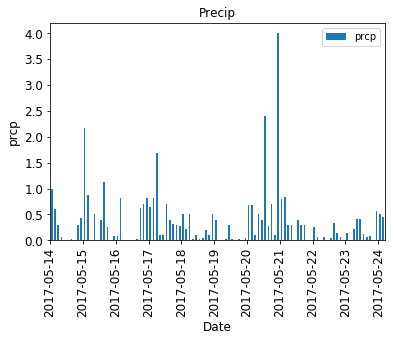

In [14]:
ax = df.plot(kind='bar', title ="Precip", legend=True, fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("prcp", fontsize=12)

#Reducing the number of ticks shown on x axis
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 10))
#plt.figure()
#df.plot()


In [15]:
#Use Pandas to print the summary statistics for the precipitation data.
df.describe()

,prcp
count,102.000000
mean,0.358922
std,0.553797
min,0.000000
25%,0.020000
50%,0.220000
75%,0.500000
max,4.000000


# Station Analysis

In [16]:
# Design a query to calculate the total number of stations.
session.query(Stations).count()

9

In [17]:
#Design a query to find the most active stations.
#List the stations and observation counts in descending order

result = session.query(
    Stations.name.label('Station Name'),
    func.count(Measurements.id).label('Observation Count')).\
filter(Stations.station == Measurements.station).\
group_by(Stations.name).\
order_by(func.count(Measurements.id).label('Observation Count').desc()).all()

result


[('WAIHEE 837.5, HI US', 2772),
 ('KANEOHE 838.1, HI US', 2696),
 ('WAIKIKI 717.2, HI US', 2685),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 2572),
 ('MANOA LYON ARBO 785.2, HI US', 2484),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 1937),
 ('HONOLULU OBSERVATORY 702.2, HI US', 1932),
 ('PEARL CITY, HI US', 683),
 ('UPPER WAHIAWA 874.3, HI US', 342)]

In [18]:
#Which station has the highest number of observations?
session.query(
    Stations.name.label('Station Name'),
    func.count(Measurements.id).label('Observation Count')).\
filter(Stations.station == Measurements.station).\
group_by(Stations.name).\
order_by(func.count(Measurements.id).label('Observation Count').desc()).limit(1).all()



[('WAIHEE 837.5, HI US', 2772)]

# Design a query to retrieve the last 12 months of temperature observation data (tobs).


In [19]:
#Design a query to retrieve the last 12 months of precipitation data.
start_period = dt.date.today() - dt.timedelta(days=365)
end_period = dt.date.today() 

sel = [Measurements.date, 
       Measurements.tobs]
results = session.query(*sel).\
    filter(Measurements.date > start_period).\
    filter(Measurements.date < end_period).\
    group_by(Measurements.date).\
    order_by(Measurements.date.asc()).all()
    
results 

[('2017-05-14', 70),
 ('2017-05-15', 72),
 ('2017-05-16', 71),
 ('2017-05-17', 71),
 ('2017-05-18', 69),
 ('2017-05-19', 68),
 ('2017-05-20', 76),
 ('2017-05-21', 69),
 ('2017-05-22', 72),
 ('2017-05-23', 69),
 ('2017-05-24', 70),
 ('2017-05-25', 75),
 ('2017-05-26', 72),
 ('2017-05-27', 72),
 ('2017-05-28', 73),
 ('2017-05-29', 74),
 ('2017-05-30', 72),
 ('2017-05-31', 75),
 ('2017-06-01', 74),
 ('2017-06-02', 76),
 ('2017-06-03', 76),
 ('2017-06-04', 77),
 ('2017-06-05', 74),
 ('2017-06-06', 74),
 ('2017-06-07', 79),
 ('2017-06-08', 75),
 ('2017-06-09', 72),
 ('2017-06-10', 74),
 ('2017-06-11', 76),
 ('2017-06-12', 74),
 ('2017-06-13', 73),
 ('2017-06-14', 74),
 ('2017-06-15', 77),
 ('2017-06-16', 74),
 ('2017-06-17', 72),
 ('2017-06-18', 77),
 ('2017-06-19', 76),
 ('2017-06-20', 74),
 ('2017-06-21', 75),
 ('2017-06-22', 76),
 ('2017-06-23', 71),
 ('2017-06-24', 73),
 ('2017-06-25', 79),
 ('2017-06-26', 79),
 ('2017-06-27', 74),
 ('2017-06-28', 74),
 ('2017-06-29', 76),
 ('2017-06-30

In [20]:
# Filter by the station with the highest number of observations.

highest_count_station = session.query(
    Stations.station).\
filter(Stations.station == Measurements.station).\
group_by(Stations.name).\
order_by(func.count(Measurements.id).label('Observation Count').desc()).limit(1).all()

#highest_count_station[0]

#Need to get rid of parenthesis in tuple
station = [item[0] for item in highest_count_station]
print(station)

['USC00519281']


In [21]:
sel = [Measurements.date, 
       Measurements.tobs]
results = session.query(*sel).\
    filter(Measurements.date > start_period).\
    filter(Measurements.date < end_period).all()
#    filter(Measurements.station == station).all()
    
results 

[('2017-05-14', 77),
 ('2017-05-15', 78),
 ('2017-05-16', 78),
 ('2017-05-17', 78),
 ('2017-05-18', 73),
 ('2017-05-19', 76),
 ('2017-05-20', 78),
 ('2017-05-21', 76),
 ('2017-05-22', 77),
 ('2017-05-23', 87),
 ('2017-05-24', 77),
 ('2017-05-25', 77),
 ('2017-05-27', 74),
 ('2017-05-28', 76),
 ('2017-05-29', 75),
 ('2017-05-30', 76),
 ('2017-05-31', 79),
 ('2017-06-01', 79),
 ('2017-06-02', 79),
 ('2017-06-03', 79),
 ('2017-06-04', 79),
 ('2017-06-05', 80),
 ('2017-06-06', 79),
 ('2017-06-07', 79),
 ('2017-06-08', 80),
 ('2017-06-09', 80),
 ('2017-06-10', 77),
 ('2017-06-11', 79),
 ('2017-06-12', 83),
 ('2017-06-13', 80),
 ('2017-06-14', 80),
 ('2017-06-15', 78),
 ('2017-06-16', 79),
 ('2017-06-17', 80),
 ('2017-06-18', 77),
 ('2017-06-19', 80),
 ('2017-06-20', 78),
 ('2017-06-21', 79),
 ('2017-06-22', 80),
 ('2017-06-23', 78),
 ('2017-06-24', 80),
 ('2017-06-25', 80),
 ('2017-06-26', 81),
 ('2017-06-27', 80),
 ('2017-06-28', 79),
 ('2017-06-29', 79),
 ('2017-06-30', 75),
 ('2017-07-01

In [22]:
#Placing results into dataframe before plotting
df = pd.DataFrame(results, columns=['date', 'tobs'])
df.set_index('date', inplace=True)

df.head()

,tobs
date,
2017-05-14,77
2017-05-15,78
2017-05-16,78
2017-05-17,78
2017-05-18,73


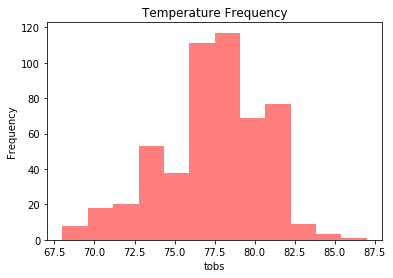

<Figure size 432x288 with 0 Axes>

In [23]:
#Plot the results as a histogram with `bins=12`.

plt.hist(df["tobs"],bins=12,color='r', alpha=0.5)
plt.title("Temperature Frequency")
plt.xlabel("tobs")
plt.ylabel("Frequency")

#ax = df.plot(kind='bar', title ="Temperature", legend=True, fontsize=12, align="edge")
#ax.set_xlabel("tobs", fontsize=12)
#ax.set_ylabel("Frequency", fontsize=12)

plt.figure()
plt.show()

# Temperature Analysis


In [51]:
#Write a function called `calc_temps` that will accept a start date and end date in the format 
#`%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

def calc_temps(start_date, end_date):
    #Design a query to retrieve the last 12 months of precipitation data.

    min_temp, = session.query(func.min(Measurements.tobs)).\
    filter(Measurements.date > start_date).\
    filter(Measurements.date < end_date).all()
    
    max_temp, = session.query(func.max(Measurements.tobs)).\
    filter(Measurements.date > start_date).\
    filter(Measurements.date < end_date).all()
    
    avg_temp, = session.query(func.avg(Measurements.tobs)).\
    filter(Measurements.date > start_date).\
    filter(Measurements.date < end_date).all()
    
    return(min_temp[0], avg_temp[0], max_temp[0]) 

In [53]:
#Using function with sample dates
min_temp, avg_temp, max_temp = calc_temps('2017-08-01','2017-08-12')

print(min_temp, max_temp, avg_temp)


71 83 79.66666666666667


In [70]:
def calc_temps_start(start_date):
        #Design a query that takes a start date and then find 
        #the min, max and avg temperatures from that date till the latest entry in the database.

    min_temp = session.query(func.min(Measurements.tobs).label("min_temp")).\
    filter(Measurements.date > start_date).all()
    
    max_temp = session.query(func.max(Measurements.tobs).label("max_temp")).\
    filter(Measurements.date > start_date).all()
    
    avg_temp = session.query(func.avg(Measurements.tobs).label("avg_temp")).\
    filter(Measurements.date > start_date).all()

    # Create a dictionary from the row data and append to a list of temperatures
    temp_list = []
    date_dict = {}
    date_dict["min_temp"] = min_temp
    date_dict["max_temp"] = max_temp
    date_dict["avg_temp"] = avg_temp
    temp_list.append(date_dict)
    
    return(temp_list) 

In [71]:
#Using function with sample dates
x = calc_temps_start('2017-08-01')

print(x)

[{'min_temp': [(70,)], 'max_temp': [(84,)], 'avg_temp': [(79.03846153846153,)]}]


([<matplotlib.axis.XTick at 0x10ae874a8>,
 <a list of 3 Text xticklabel objects>)

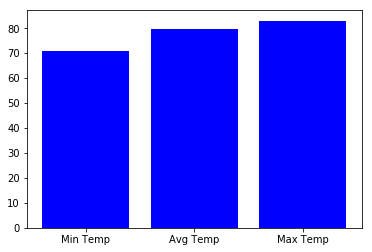

In [57]:
#Plot the min, avg, and max temperature from your previous query as a bar chart.
#Use the average temperature as the bar height.
#Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

temp = ["Min Temp", "Avg Temp", "Max Temp"]
values = [min_temp, avg_temp, max_temp]

x_axis = np.arange(len(temp))

# Create the ticks for our bar chart's x axis
# Create a bar chart based upon the above data
plt.bar(x_axis, values, color="b", align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, temp)

# Optional Recommended Analysis (Not completed)

# Step 4 - Climate App